In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Data taken from github
https://github.com/MFuchs1989/Datasets-and-Miscellaneous/tree/main/datasets
https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/winequality.csv

In [2]:
url = 'https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/winequality.csv'
df = pd.read_csv(url).dropna()

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [5]:
x = df.drop('type', axis=1)
y = df['type']

## Data processing 

In [6]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [7]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [8]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

### 2 Hiden Layer (5, 2)

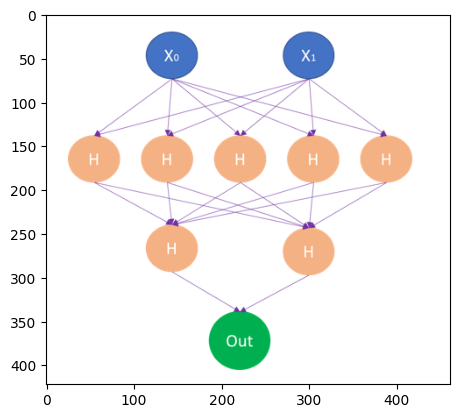

In [9]:
import matplotlib.image as mpimg
# Read Images
img = mpimg.imread('./images/mlp.png')
# Output Images
plt.imshow(img)
plt.show()

In [10]:
mlp_clf.fit(trainX_scaled, trainY)
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


C:\Users\farenrai\Desktop\mlworkspace\.pymlvenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## 3 Hiden Layer  (150, 100, 50)

In [11]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


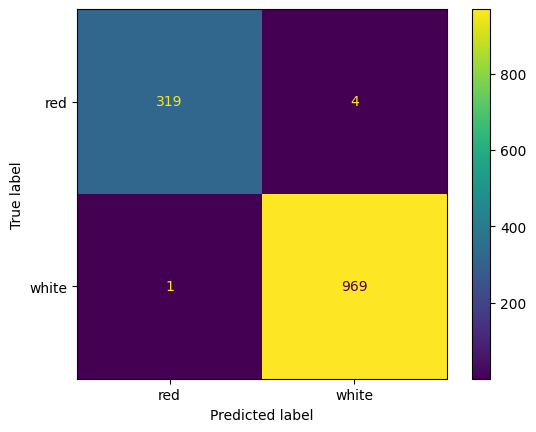

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, y_pred, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)
disp.plot()

In [13]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       323
       white       1.00      1.00      1.00       970

    accuracy                           1.00      1293
   macro avg       1.00      0.99      0.99      1293
weighted avg       1.00      1.00      1.00      1293



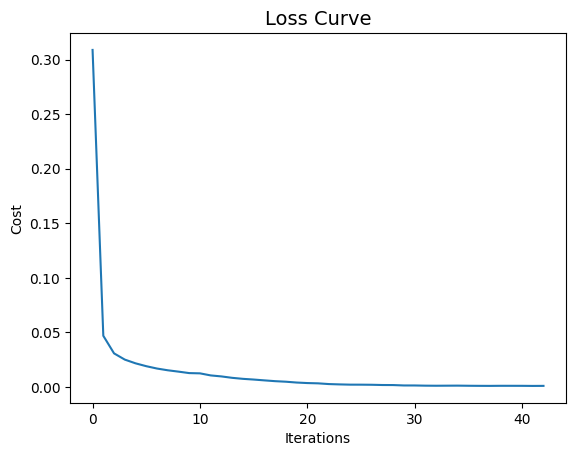

In [14]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Hyper Parameter Tuning

In [15]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [16]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)
print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'adam'}


C:\Users\farenrai\Desktop\mlworkspace\.pymlvenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
grid_predictions = grid.predict(testX_scaled) 
print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.99


### Apply Best Parameter again compile model

In [18]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50, 30),
                        max_iter = 100,activation = 'tanh',
                         learning_rate= 'adaptive',
                        alpha= 0.0001,
                        solver = 'adam')

In [19]:
mlp_clf.fit(trainX_scaled, trainY)
y_pred = mlp_clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


C:\Users\farenrai\Desktop\mlworkspace\.pymlvenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


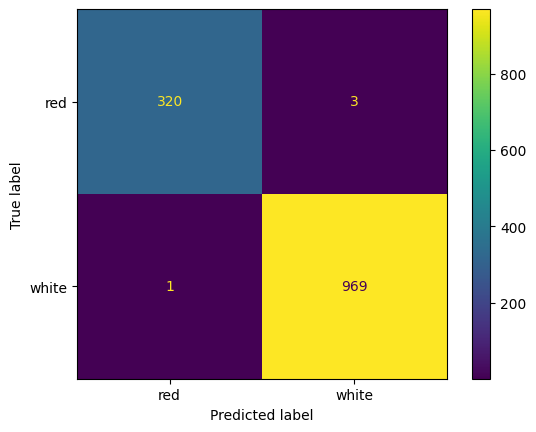

In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, y_pred, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)
disp.plot()

In [21]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       323
       white       1.00      1.00      1.00       970

    accuracy                           1.00      1293
   macro avg       1.00      0.99      1.00      1293
weighted avg       1.00      1.00      1.00      1293



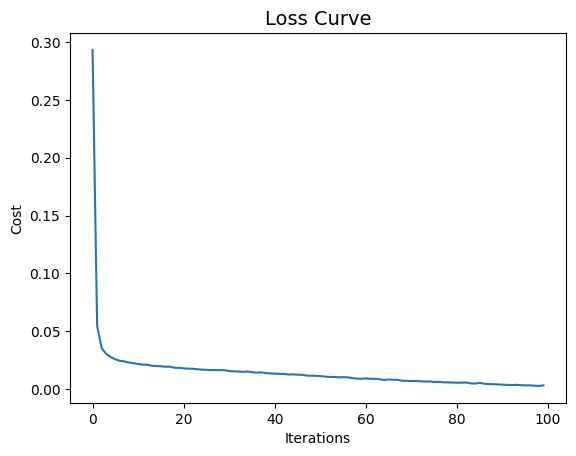

In [22]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
testX_scaled[0]

array([-0.24463976, -0.85289531,  0.14134849, -0.74414446, -0.38123665,
       -0.30930383,  0.3510777 , -0.39588439,  0.57370719,  0.47230449,
       -0.33091584, -2.08929097])

In [24]:
y_pred

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [25]:
## Referance
#https://michael-fuchs-python.netlify.app/2019/10/31/introduction-to-logistic-regression/#model-evaluation